# Problems

## Problem 1: Extending the Lady Tasting Tea

The Lady Tasting Tea experiment was designed by statistician Ronald A. Fisher to investigate Dr Muriel Bristol's claim that she could tell whether milk or tea was poured first into a cup. Fisher set up an experiment with 8 cups of tea, 4 with milk first and 4 with tea first, arranged in random order. Bristol had to correctly identify which cups were which. Fisher used this setup to demonstrate how to form a null hypothesis (she is guessing) and evaluate the probability of correctly identifying all cups by chance.

Here we will extend the experiment to 12 cups of tea, 4 with milk first and 8 with tea first and simulate using `numpy`, comparing the results with the original 8 cup design.

References:
- https://www.irishtimes.com/news/science/how-a-tea-tasting-test-led-to-a-breakthrough-in-statistics-1.3998786
- https://en.wikipedia.org/wiki/Lady_tasting_tea
- https://www.youtube.com/watch?v=8ERFV7rV0vg&t=901s&pp=ygUQbGFkeSB0YXN0aW5nIHRlYQ%3D%3D

### Import Python Modules

In [115]:
# First let's import the python modules we will be using to conduct the analysis.
# https://numpy.org/doc/stable/user/index.html
import numpy as np

# https://matplotlib.org/stable/users/index
import matplotlib.pyplot as plt

# https://docs.python.org/3/library/math.html
import math

# https://docs.python.org/3/library/itertools.html
import itertools

### Extended 12 Cup Experiment

Setting up the extended 12 cup experiment we can use `math.comb(n,k)` to calculate how many ways there are of selecting 4 items out of 12, where the order of the items does not matter and no item is selected more than once. There are a total of 495 combinations when choosing 4 items out of 12 which tells us that if randomly selecting the cups, there is a 1-in-495 chance of correctly identifying all 4 milk first cups.

In [116]:
# Number of cups
cups = 12
milk_first = 4

# Function to calc combinations and print result.
def combos(cups, milk_first):
    # https://docs.python.org/3/library/math.html#math.comb
    combinations = math.comb(cups, milk_first)
    print(f"Total combinations when choosing {milk_first} from {cups}: {combinations}")
    print(f"Probability of correctly identifying 4 milk first cups: 1/{combinations}")

# Run the function.
combos(cups, milk_first)

Total combinations when choosing 4 from 12: 495
Probability of correctly identifying 4 milk first cups: 1/495


We can further demonstrate this by labelling the cups and using `itertools.combinations` to generate a list of all the combinations of 4 cups. We can see that the length of the list is 495.

In [117]:
# Function to label cups and create a list of all combinations.
def labelled_combos(cups, milk_first):
    # Label the 8 cups.
    # https://numpy.org/doc/stable/reference/generated/numpy.arange.html
    cup_labels = np.arange(cups)

    # Generate all combinations.
    # https://docs.python.org/3/library/itertools.html#itertools.combinations
    combinations = list(itertools.combinations(cup_labels, milk_first))
    
    return cup_labels, combinations

# Run the function.
cup_labels, combinations = labelled_combos(cups, milk_first)

# Print results.
print(f"Cup labels: {cup_labels}")
print(f"Total combinations: {len(combinations)}")
print(f"Combinations: {combinations}")

Cup labels: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Total combinations: 495
Combinations: [(0, 1, 2, 3), (0, 1, 2, 4), (0, 1, 2, 5), (0, 1, 2, 6), (0, 1, 2, 7), (0, 1, 2, 8), (0, 1, 2, 9), (0, 1, 2, 10), (0, 1, 2, 11), (0, 1, 3, 4), (0, 1, 3, 5), (0, 1, 3, 6), (0, 1, 3, 7), (0, 1, 3, 8), (0, 1, 3, 9), (0, 1, 3, 10), (0, 1, 3, 11), (0, 1, 4, 5), (0, 1, 4, 6), (0, 1, 4, 7), (0, 1, 4, 8), (0, 1, 4, 9), (0, 1, 4, 10), (0, 1, 4, 11), (0, 1, 5, 6), (0, 1, 5, 7), (0, 1, 5, 8), (0, 1, 5, 9), (0, 1, 5, 10), (0, 1, 5, 11), (0, 1, 6, 7), (0, 1, 6, 8), (0, 1, 6, 9), (0, 1, 6, 10), (0, 1, 6, 11), (0, 1, 7, 8), (0, 1, 7, 9), (0, 1, 7, 10), (0, 1, 7, 11), (0, 1, 8, 9), (0, 1, 8, 10), (0, 1, 8, 11), (0, 1, 9, 10), (0, 1, 9, 11), (0, 1, 10, 11), (0, 2, 3, 4), (0, 2, 3, 5), (0, 2, 3, 6), (0, 2, 3, 7), (0, 2, 3, 8), (0, 2, 3, 9), (0, 2, 3, 10), (0, 2, 3, 11), (0, 2, 4, 5), (0, 2, 4, 6), (0, 2, 4, 7), (0, 2, 4, 8), (0, 2, 4, 9), (0, 2, 4, 10), (0, 2, 4, 11), (0, 2, 5, 6), (0, 2, 5, 7), (0, 2, 5, 8), (0, 2, 

Now let's randomly shuffle the milk first cups using `numpy.random.choice` and then compare the 4 cups to the list of all combinations. Using the `python set intersection method` we can get the number of milk first cups that appear in each combination.

In [118]:
# Function to randomly shuffle the milk first cups and get the interection.
def matches(cups, milk_first):
    cup_labels, combinations = labelled_combos(cups, milk_first)
    # Label the milk first cups.
    # https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html#numpy-random-rand
    milk_first_labels = np.random.choice(cup_labels, milk_first, replace=False)

    total_matches = []
    cups_chosen = []
    number = []
    loop = 0
    # Loop through all combinations.
    for comb in combinations:
        # Return the common elements between sets.
        # https://docs.python.org/3/library/stdtypes.html#frozenset.intersection
        match = set(comb).intersection(set(milk_first_labels))
        # Add the count of common elements to a list.
        total_matches.append(len(match))
        # Loop through first 5 sets for printing results.
        loop += 1
        if loop < 6:
            cups_chosen.append(comb)
            number.append(len(match))
    
    return milk_first_labels, cups_chosen, number, total_matches


# Run the function.
x = matches(cups, milk_first)

# Print results.
print(f"Milk first labels: {x[0]}")
print("First 5 sets:")
index = 0
for i in x[1]:
    print(f"Cups chosen: {i}, Number of milk first cups: {x[2][index]}")
    index += 1

Milk first labels: [8 5 3 4]
First 5 sets:
Cups chosen: (0, 1, 2, 3), Number of milk first cups: 1
Cups chosen: (0, 1, 2, 4), Number of milk first cups: 1
Cups chosen: (0, 1, 2, 5), Number of milk first cups: 1
Cups chosen: (0, 1, 2, 6), Number of milk first cups: 0
Cups chosen: (0, 1, 2, 7), Number of milk first cups: 0


Now that we have the number of milk first cups in each combination, we can now use `np.unique` to get the count and calculate the probability of correctly choosing 0, 1, 2, 3, or 4 cups and also plot the results using `matplotlib.pyplot`.

|At Least   |Probability    |
|-----------|---------------|
|1 cup      |85.86%         |
|2 cups     |40.61%         |
|3 cups     |6.67%          |

Probability of choosing 0 cups correctly: 70/495 (0.1414)
Probability of choosing 1 cups correctly: 224/495 (0.4525)
Probability of choosing 2 cups correctly: 168/495 (0.3394)
Probability of choosing 3 cups correctly: 32/495 (0.0646)
Probability of choosing 4 cups correctly: 1/495 (0.0020)


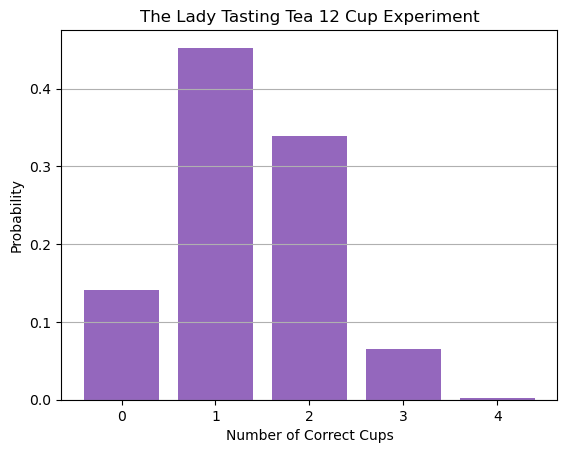

In [119]:
# Function to get the count and plot the result.
def plot_prob(cups, milk_first):
    total_matches = matches(cups, milk_first)[3]
    # Get the counts.
    # https://numpy.org/doc/stable/reference/generated/numpy.unique.html
    count = np.array(np.unique(total_matches, return_counts=True))

    # Loop through to print the probabilities.
    index = 0
    for cup in count[0]:
        fraction = f"{(count[1][index])}/{(sum(count[1]))}"
        probability = (count[1][index])/(sum(count[1]))
        print(f"Probability of choosing {cup} cups correctly: {fraction} ({probability:.4f})")
        index += 1

    # Plot the probabilities.
    fig, ax = plt.subplots()

    # Set x & y variables.
    x = count[0]
    y = count[1]/sum(count[1])

    # Set the colour based on number of cups.
    if (cups - milk_first) == milk_first:
        color = 'tab:orange'
    else:
        color = 'tab:purple'

    # Generate the bar chart.
    ax.bar(x, y, color=color)

    # Add title, labels and grid.
    ax.set_title(f"The Lady Tasting Tea {cups} Cup Experiment")
    ax.set_xlabel("Number of Correct Cups")
    ax.set_ylabel("Probability")
    ax.grid(axis="y")

    # Show plot.
    plt.show()

# Run the function
plot = plot_prob(cups, milk_first)

### Comparing to the Original 8 Cup Experiment

Probability of choosing 0 cups correctly: 1/70 (0.0143)
Probability of choosing 1 cups correctly: 16/70 (0.2286)
Probability of choosing 2 cups correctly: 36/70 (0.5143)
Probability of choosing 3 cups correctly: 16/70 (0.2286)
Probability of choosing 4 cups correctly: 1/70 (0.0143)


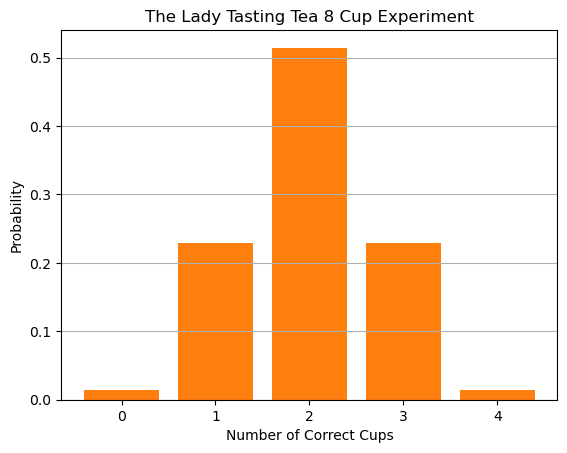

In [120]:
# Number of cups
orig_cups = 8

# Run the function.
plot = plot_prob(orig_cups, milk_first)

## Problem 2: Normal Distribution

## Problem 3: t-Tests

## Problem 4: ANOVA

## End